# Стандартные метрики классификации

In [2]:
import sklearn.metrics
import numpy as np
from sklearn.datasets import load_iris, load_breast_cancer, load_diabetes
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_validate
import matplotlib.pyplot as plt

from IPython.display import display, Image

%matplotlib inline

In [3]:
iris_data = load_iris()

In [4]:
pred = LogisticRegression(solver = 'liblinear', multi_class = 'auto').fit(iris_data.data, iris_data.target).predict(iris_data.data)
pred_proba = LogisticRegression(solver = 'liblinear', multi_class = 'auto').fit(iris_data.data, iris_data.target).predict_proba(iris_data.data)

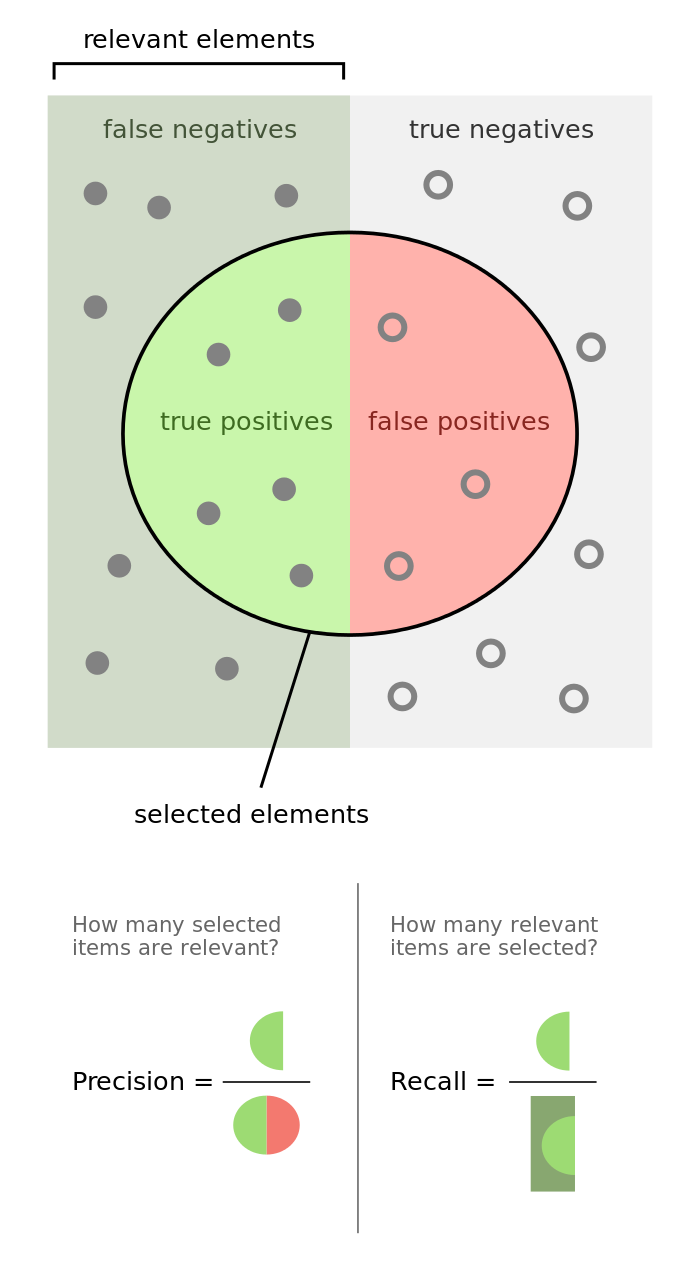

In [5]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png'
Image(url, width=300)

### Accuracy

$$ Accuracy = \dfrac{TP+TN}{TP+TN+FP+FN} $$

- доля объектов, в которых предсказанный класс совпал с реальным
- вероятность правильно предсказать класс на случайно выбранном объекте
- нерепрезентативна при несбалансированных классах

In [6]:
sklearn.metrics.accuracy_score(iris_data.target, pred)

0.96

### Precision


$$ Precision = \dfrac{TP}{TP+FP} $$

- количество правильно предсказанных объектов класса делённое на количество  объектов, которым этот класс был предсказан

- вероятность того, что объект, отнесённый моделью к классу, окажется объектом этого класса: $P(y = c \mid a(x) = c)$

In [11]:
sklearn.metrics.precision_score(iris_data.target, pred, average=None)

array([1.        , 0.97826087, 0.90740741])

### Recall


$$ Recall = \dfrac{TP}{TP+FN} $$


- количество правильно предсказанных объектов класса делённое на количество  объектов этого класса

- вероятность того, что объект  класса будет отнесён моделью к этому классу: $P(a(x) = с \mid y = с)$

In [19]:
sklearn.metrics.recall_score(iris_data.target, pred, average=None)

array([1.  , 0.9 , 0.98])

### [F1-score](https://en.wikipedia.org/wiki/F1_score)

$$ F_{1}=\left({\frac {\mathrm {recall} ^{-1}+\mathrm {precision} ^{-1}}{2}}\right)^{-1}=2\cdot {\frac {\mathrm {precision} \cdot \mathrm {recall} }{\mathrm {precision} +\mathrm {recall} }}   $$ 



- Является средним гармоническим между precision и recall 

- Имеет обобщение для учёта важности precision и recall:  $f_{\beta} = \frac{(1+\beta^2)}{\beta^2} \frac{ precision~recall}{precision~+~recall}$ 


In [20]:
sklearn.metrics.f1_score(iris_data.target, pred, average=None)

array([1.        , 0.9375    , 0.94230769])

In [23]:
sklearn.metrics.fbeta_score(iris_data.target, pred, beta=2, average=None)

array([1.        , 0.91463415, 0.96456693])

### Classification report

Быстрый способ посмотреть сразу на все эти метрики - функция classification_report

support - количество объектов данного класса

In [26]:
print(sklearn.metrics.classification_report(iris_data.target, pred, digits=4))

             precision    recall  f1-score   support

          0     1.0000    1.0000    1.0000        50
          1     0.9783    0.9000    0.9375        50
          2     0.9074    0.9800    0.9423        50

avg / total     0.9619    0.9600    0.9599       150



### Precision-recall curve

Довольно часто алгоритм выдаёт не просто метку класса, а вероятность / меру уверенности в классификации объекта, выставляя различные пороги для классов, мы получим не одну точку (precision, recall), а целый набор точек.

Тогда информативен совместный график precision-recall-threshold

Получить его можно при помощи функции precision_recall_curve

Используем dataset с бинарным target-ом

In [20]:
cancer_data = load_breast_cancer()
probas = LogisticRegression(solver='liblinear').fit(cancer_data.data, cancer_data.target).predict_proba(cancer_data.data)
precision, recall, threshold = sklearn.metrics.precision_recall_curve(cancer_data.target, probas[:, 1])

In [40]:
np.unique(cancer_data.target,  return_counts=True)

(array([0, 1]), array([212, 357]))

In [41]:
sklearn.metrics.accuracy_score(cancer_data.target, np.repeat(0, len(probas)))

0.37258347978910367

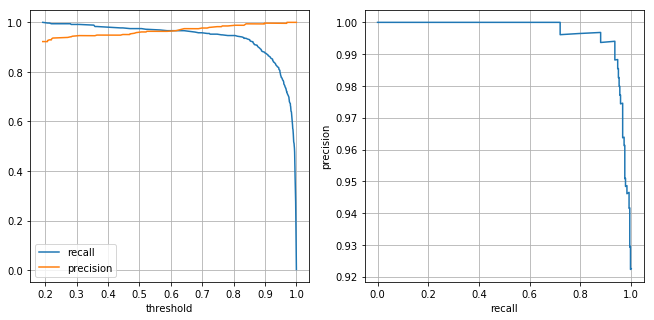

In [49]:
plt.figure(figsize=(11, 5))
plt.subplot(1, 2, 1)
plt.xlabel('threshold')
plt.plot(threshold, recall[:-1])
plt.plot(threshold, precision[:-1])
plt.legend(['recall', 'precision'])
plt.grid()

plt.subplot(1, 2, 2)
plt.xlabel('recall')
plt.ylabel('precision')
plt.plot(recall, precision)
plt.grid()

plt.show()

### PR-AUC

PR Area Under Curve - площадь под precision-recall прямой (в sklearn этот метод называется ``average_precision_score``)

In [50]:
sklearn.metrics.average_precision_score(cancer_data.target, probas[:, 1])

0.9967780027659081

### ROC-AUC

ROC кривая - это набор точек $(FPR, TPR)$, полученный варированием порога


-  True Positive Rate: $TPR = \frac{TP}{TP + FN}$

- False Positive Rate: $FPR = \frac{FP}{FP + TN}$

ROC AUC - площадь под данной кривой (в sklearn считается функцией roc_auc_score)

In [52]:
sklearn.metrics.confusion_matrix(iris_data.target, pred)

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  1, 49]])

In [53]:
sklearn.metrics.confusion_matrix(cancer_data.target, probas[:, 1] > 0.5)

array([[198,  14],
       [  9, 348]])

In [54]:
((tp, fp),
 (fn, tn)) = sklearn.metrics.confusion_matrix(cancer_data.target, probas[:, 1] > 0.5)

In [58]:
tp / (tp + fn), fp / (fp + tn)

(0.9565217391304348, 0.03867403314917127)

In [59]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(cancer_data.target, probas[:, 1])

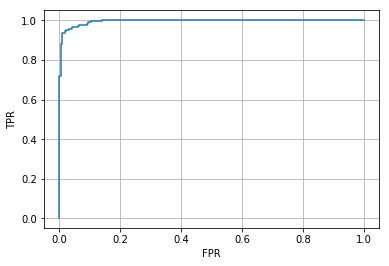

In [60]:
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr, tpr)
plt.grid()
plt.show()

In [33]:
sklearn.metrics.roc_auc_score(cancer_data.target, probas[:, 1])

0.9948073569050261

In [61]:
# ROC AUC константного предсказания:
sklearn.metrics.roc_auc_score(cancer_data.target, np.zeros_like(cancer_data.target))

0.5

In [65]:
# ROC AUC случайного предсказания(то есть proba - равномерно распределённая на отрезке случайная величина):
sklearn.metrics.roc_auc_score(cancer_data.target, np.random.uniform(size=len(cancer_data.target)))

0.5192510966650812

### Log Loss  vs Cross Entropy

$$LL = - y \log a(x) - (1 - y) \log (1 - a(x))$$


- минус логарифм правдоподобия выборки 

- многоклассовый случай: $LL = - \sum\limits y \log p(y| x)$, где $y$ - класс объекта 



$$CE = - \sum\limits_{x} p(x) \log q(x) = - y \log \hat{y} - (1 - y) \log (1 - \hat{y})) $$

- перекрёстная энтропия между двумя распределениями вероятностей измеряет среднее число бит, необходимых для опознания события из набора возможностей, если используемая схема кодирования базируется на заданном распределении вероятностей $q$, вместо «истинного» распределения $p$.


- Log loss and cross-entropy are slightly different depending on the context, but in machine learning when calculating error rates between 0 and 1 they resolve to the same thing. As a demonstration, where $p$ and $q$ are the sets $p\in\{y, 1−y\}$ and $q\in\{\hat{y}, 1−\hat{y}\}$ we can rewrite cross-entropy as exactly the same as log loss!



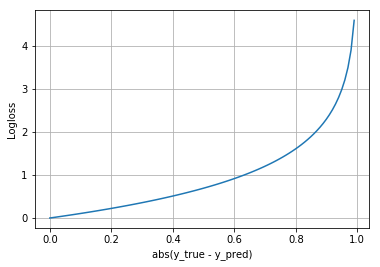

In [107]:
x = np.linspace(0, 1-1e-15, 100)
loss = [-np.log(1-i) for i in x]

plt.ylabel('Logloss')
plt.xlabel('abs(y_true - y_pred)')
plt.plot(x[:-1], loss[:-1])
plt.grid()

In [99]:
sklearn.metrics.log_loss(cancer_data.target, probas[:, 1])

0.09248827292632657

In [101]:
sklearn.metrics.log_loss(iris_data.target, pred_proba)

0.3093539212177246

In [102]:
a = np.arange(10)
np.clip(a, [3, 4, 1, 1, 1, 4, 4, 4, 4, 4], 8)

array([3, 4, 2, 3, 4, 5, 6, 7, 8, 8])